# Neural Network

- Human brain works with biological neurons. Ability of machine to recognize things like digits ,objects on ots own is known as neural network.
- Multiple neurons are combined to form a neural network

## Anatomy of Neural Network

- There are three layers:
    1.  Input layer --> It takes pixels as input from images
    2.  Hidden Layer --> Doing computations and extracting features
    3.  Output Layer --> Provides prediction (i.e. 0-9)

- Key concepts
    1. Weight: Learnable parameters controlling input importance
    2. Bias (b): Shift the activation function curve
    3. Activation function: Change to non linearity(eg. ReLU, Sigmoid, tanh, etc.)
    4. Loss function: Measures how wrong our model 
    5. Optimizers: Adjust the weight to  minimize loss(SGD, Adam, etc.)

- Math behind neural network 
    - x(i) --> Input
    - w(i) --> weight
    - b --> Bias
    - z --> weighted sum

    - z = w1x1+w2x2+.............wnxn +b

    - Activation function
          a = f(z)

     - If you use ReLu
         f(z) = max(0,z)




  






## Classification of digits using NN

## MNIST: (Modified National Institute of Standards and Technology)
## This is hello world of Computer Vision

- 70K images data for handwritten digits (0-9)
- 28*28 size images grayscales pixel
- Train = 60k 
- Test = 10k 

# Preprocessing MNIST dataset

  - Before feeding the neural network

  - Flatten 28*28: 784 input features(for  dense layer) Or keep as 28*28 is we are using CNN
  - Normalization: Divide value by 255 to get in range [0,1]
  - One-hot Encoding: For eg [0 0 0 1 0 0 0 0 0 0]
  

# MNIST dataset Training Testing and Evaluation

#Neural network architecture
- Input : 784 neurons
- Hidden Layer : 128 neurones (ReLU)
- Hidden Layer : 64 neurones (ReLU)
- Output Layer : 10 neurones (0-9)

# For Training
1. Initialize weight randomly
2. Forward pass: Compute prediction
3. Calculate loss:
     - Summation(yilog(yicap))
4. Backpropagation error
5. Updated weight
6. Repeated it for many epochs until convergnaces

# Challenges :

1. Overfitting:
     Model memorizes training data but fails with new images data
     - Dropout, regularization 
2. Underfitting:
     Model too simple (less datasets)

3. Learning rate tuning:
     - too high = unstable 
     - too low = slow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


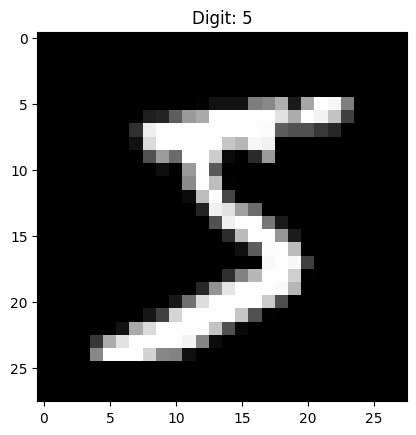

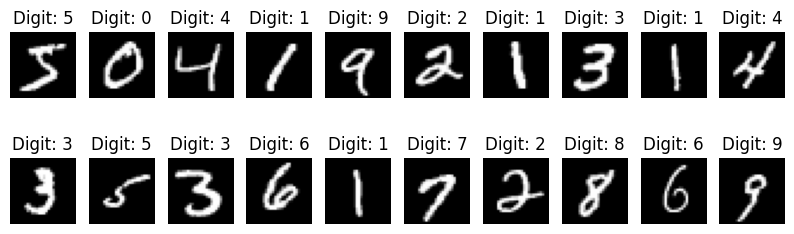

In [11]:
# Load dataset and visualize 20 sample digits

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Digit: {y_train[0]}")
plt.show()


plt.figure(figsize=(10, 3))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.show()

In [12]:
# Data Preprocessing

# Normalization

x_train = x_train/255
x_test = x_test/255

# On hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(y_train_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
#Build a feed forward neural network

model = Sequential([
    # Flatten Layer: shape convert it into 784(1D)
    Flatten(input_shape=(28, 28)),

    # First hidden layer
    Dense(128, activation='relu'),

    # Second hidden layer
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])


In [14]:
# Compile the model 

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#train the model
history = model.fit(
    x_train,
    y_train_cat,
    epochs = 10, #no of passes over entire training data
    batch_size = 128,
    validation_split = 0.1 #10% of data remain for validation

)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.3585 - val_accuracy: 0.9610 - val_loss: 0.1454
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9565 - loss: 0.1495 - val_accuracy: 0.9673 - val_loss: 0.1144
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.1060 - val_accuracy: 0.9738 - val_loss: 0.0892
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0776 - val_accuracy: 0.9752 - val_loss: 0.0849
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9817 - loss: 0.0607 - val_accuracy: 0.9785 - val_loss: 0.0724
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9770 - val_loss: 0.0775
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0397 - val_accuracy: 0.9797 - val_loss: 0.0734
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9902 - loss: 0.0327 - val_accuracy: 0.

In [16]:
# Model Evaluation

loss, accuracy = model.evaluate(x_test,y_test_cat)

print(f"Test accuracy{accuracy} and loss lavue: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9767 - loss: 0.0826
Test accuracy0.9767000079154968 and loss lavue: 0.08258463442325592


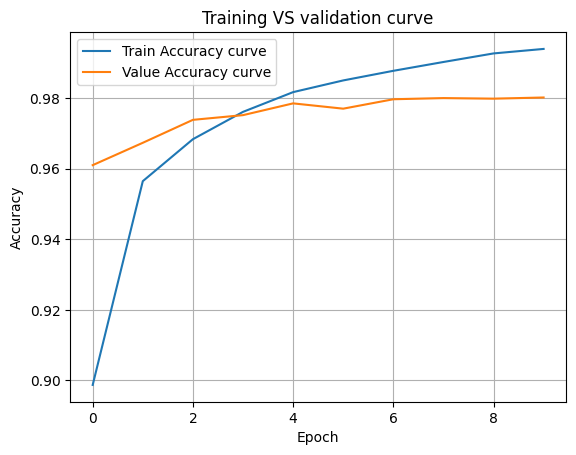

In [17]:
#plotting the model 

plt.plot(history.history['accuracy'], label= "Train Accuracy curve")
plt.plot(history.history['val_accuracy'], label = "Value Accuracy curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.title("Training VS validation curve")
plt.legend()
plt.grid(True)
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


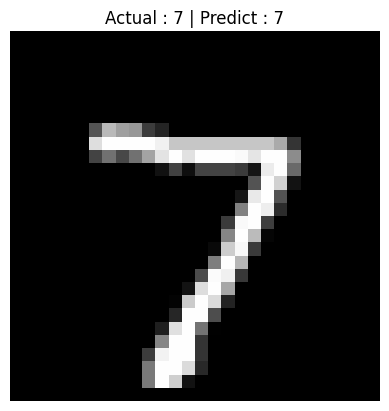

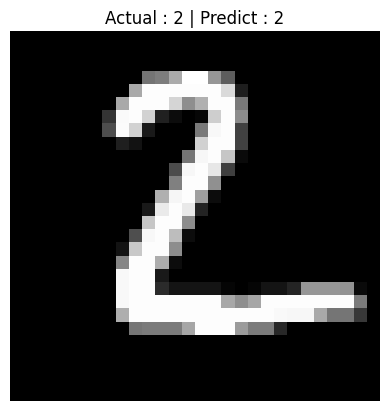

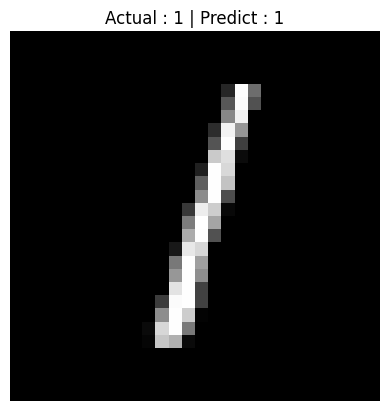

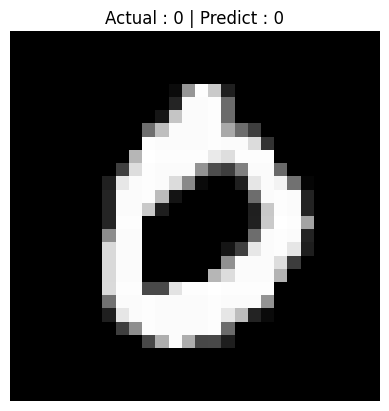

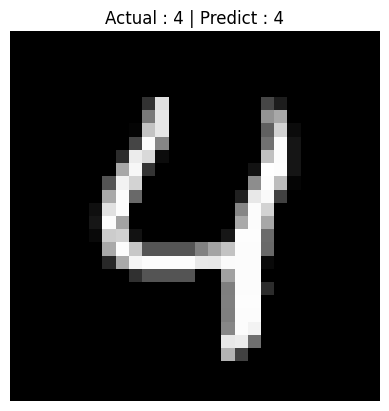

In [18]:
predictions = model.predict(x_test)

import numpy as np

# Convert probability vectors to class numbers
predicted_classes = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Actual : {y_test[i]} | Predict : {predicted_classes[i]}')
    plt.axis('off')
    plt.show()
   

In [19]:
#save the model 
model.save("mnist_model.h5")